In [1]:
from utils import read_pkl
from data import data_loader
from spread import spread_manager
import datetime as dt
import pandas as pd
from revert import df_to_inv_mom

In [2]:
filename='t025imb1corr090typeabs.pkl' #load in whatever you named the coef_matrix

data=data_loader('2024-01-01')
path='data/'+data.dataset+'/'+filename
coefs=read_pkl(path)

In [3]:
price_data=data.load_price()
price_data['CONST']=1

spreads=spread_manager(price_data,coefs)
spreads.calc_costs()
signals=spreads.raw_signal()

In [7]:
z_score=spreads.new_z_score()

rev=df_to_inv_mom(z_score)

In [9]:
spreads.signal_z_score_filter()

,Automobiles & Components 1,Banks 1,Banks 2,Banks 3,Banks 4,Banks 5,Banks 6,Banks 7,Banks 8,Banks 9,...,Utilities 3957,Utilities 3958,Utilities 3959,Utilities 3960,Utilities 3961,Utilities 3962,Utilities 3963,Utilities 3964,Utilities 3965,Utilities 3966
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,False,False,True,True,True,True
2021-01-05,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,False,False,True,True,True,True
2021-01-06,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2021-01-07,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2021-01-08,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-28,False,True,True,True,False,True,True,True,True,True,...,False,True,True,True,True,True,True,True,False,True
2024-10-29,False,True,True,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,True
2024-10-30,False,True,True,True,False,True,True,True,True,True,...,False,True,True,True,True,True,True,True,False,True


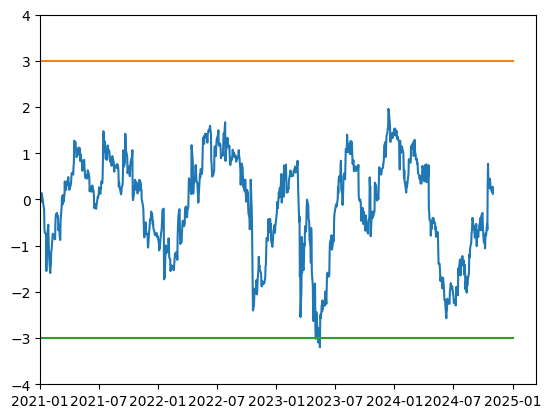

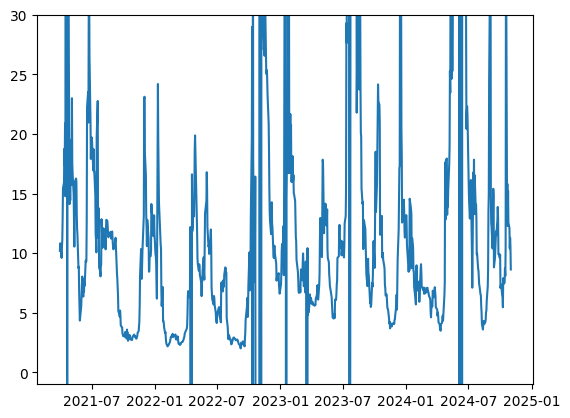

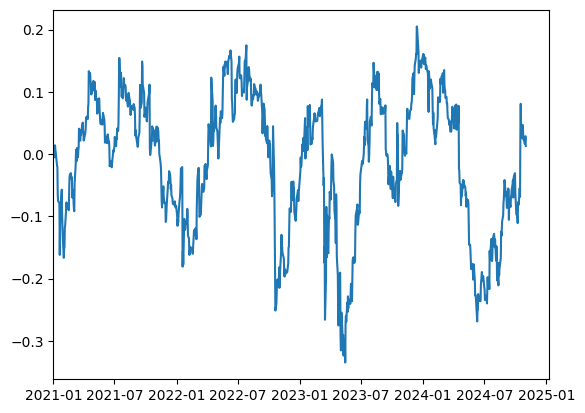

In [17]:
import matplotlib.pyplot as plt
bbin='Banks 1'
plt.plot(z_score[bbin])
plt.plot([dt.date(2021,1,1),dt.date(2025,1,1)],[3,3])
plt.plot([dt.date(2021,1,1),dt.date(2025,1,1)],[-3,-3])
plt.xlim(dt.date(2021,1,1))
plt.ylim(-4,4)
plt.show()
plt.plot(df_to_rev(z_score[[bbin]],lag=250)[bbin])
plt.ylim(-1,30)
plt.show()
plt.plot(signals[bbin])
plt.xlim(dt.date(2021,1,1))
plt.show()
